<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


None

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

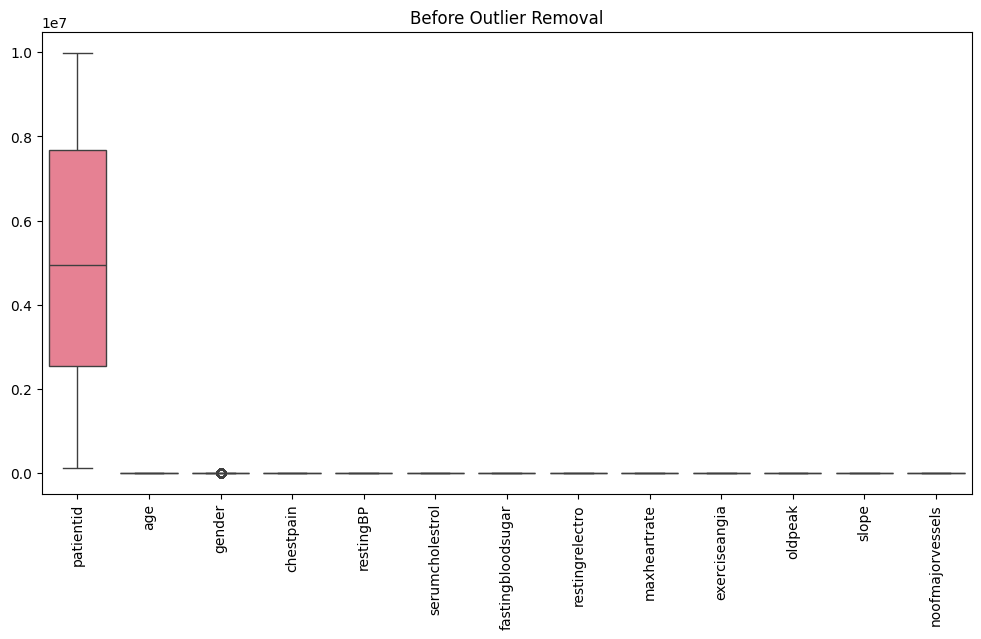

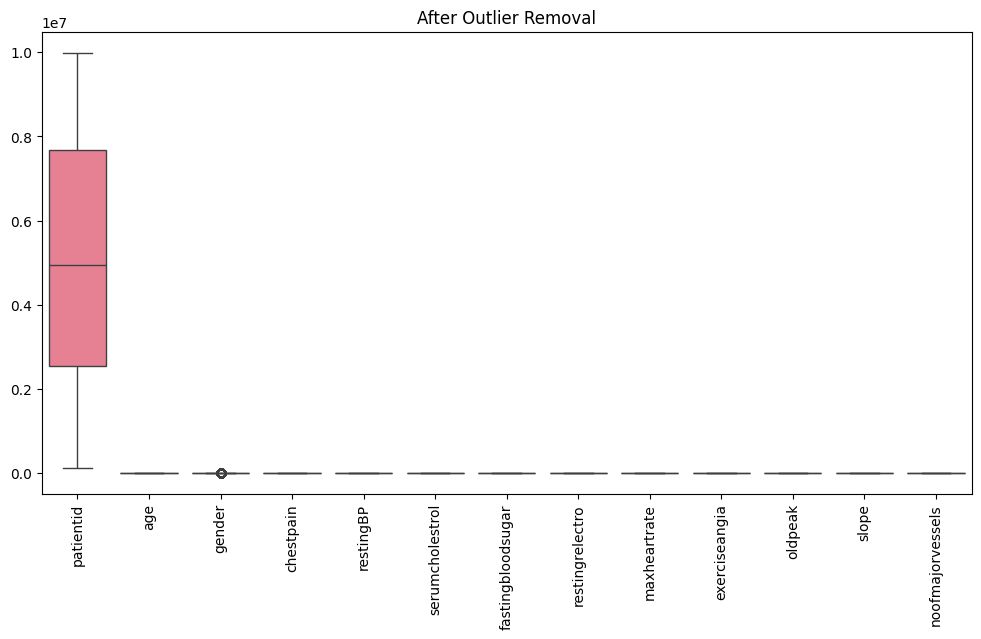

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9800
Confusion Matrix:
[[ 82   2]
 [  2 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.98      0.98      0.98       116

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



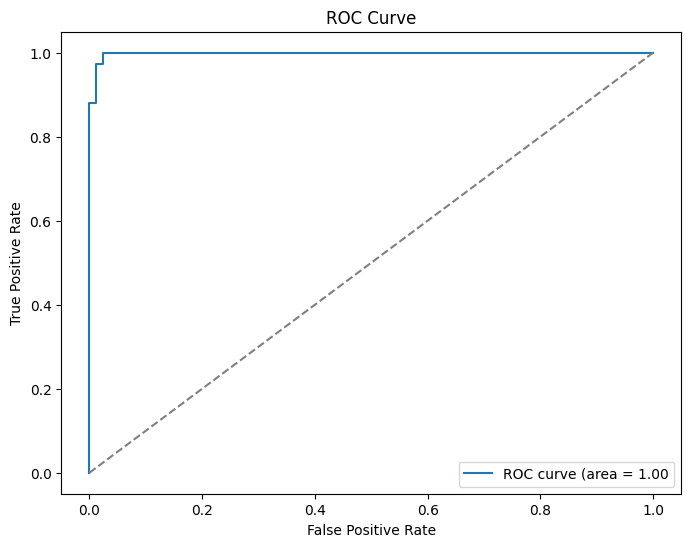

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats

#Load Dataset
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

#View basic data information
display(data.info())
display(data.describe())

#Checking for missing values
display(data.isnull().sum())

#Set the variable name to target
target_column = 'target'  

#Identifying outliers with Z-score
z_scores = np.abs(stats.zscore(data.drop(columns=[target_column])))
thresh = 3  
outliers = (z_scores > thresh).any(axis=1)

#Draw the characteristic distribution of outliers before processing
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=[target_column]))
plt.title("Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()

#Removing outliers
df_clean = data[~outliers]

#Draw the characteristic distribution of the outliers after processing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean.drop(columns=[target_column]))
plt.title("After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

#Splitting characteristics and target variables
X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]

#standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data set splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Logistic regression hyperparameter optimisation
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs'], 'penalty': ['l2']}
]
grid_search = GridSearchCV(LogisticRegression(max_iter=500, class_weight='balanced'), param_grid, cv=5, scoring=['accuracy', 'f1'], refit='accuracy')
grid_search.fit(X_train, y_train)

#Selection of the optimal model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

#carry out forecasting
y_pred = best_model.predict(X_test)

#assessment model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

#Plotting the ROC curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
